# HACKATHON INFMDI721 : QUELLES ENERGIES POUR DEMAIN ?

#### - Erwann Floch
#### - Antonin Durieux
#### - Kaëlig Castor

In [1]:
%matplotlib inline
import geopandas as gpd
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import mapclassify
import numpy as np
import seaborn as sns
matplotlib.style.use('seaborn')

# PARTIE 1 : Démographie, Production de CO2

In [2]:
CO2=pd.read_csv('Data/CO2.csv', sep = ';', index_col = 0)
CO2.describe()

,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,89.000000,89.000000,89.000000,89.00000,...,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,546.343182,570.190909,587.295455,619.487500,658.286364,694.544318,709.608989,742.696629,783.156180,777.91573,...,1203.177451,1256.592157,1291.424510,1304.127451,1322.196078,1321.934314,1320.778431,1325.180392,1338.431373,1363.160784
std,1630.848177,1702.341929,1753.704681,1851.777443,1963.971490,2066.056930,2115.147769,2213.428349,2332.060703,2307.61343,...,3909.666758,4090.643195,4231.890426,4285.242047,4356.969759,4367.805737,4364.342327,4379.260575,4427.750824,4521.894782
min,0.200000,0.200000,0.400000,1.300000,1.500000,1.500000,1.600000,1.600000,1.700000,1.60000,...,2.600000,2.500000,2.500000,2.500000,2.700000,2.700000,2.900000,3.200000,3.400000,3.500000
25%,12.450000,13.600000,13.850000,13.475000,14.550000,16.175000,16.400000,17.600000,18.000000,17.80000,...,45.825000,49.025000,50.875000,46.875000,45.825000,46.050000,46.175000,47.075000,46.400000,46.875000
50%,28.000000,29.650000,31.750000,34.700000,38.000000,41.800000,43.400000,46.800000,54.200000,55.20000,...,103.550000,106.800000,107.800000,110.050000,113.150000,111.600000,116.500000,122.000000,124.550000,123.200000
75%,142.850000,147.400000,151.400000,159.050000,166.600000,172.600000,181.000000,192.600000,202.400000,189.00000,...,399.975000,409.525000,421.950000,427.475000,426.775000,431.525000,422.725000,417.400000,410.025000,410.975000
max,11193.900000,11708.900000,12068.100000,12725.800000,13518.800000,14269.500000,14765.800000,15468.000000,16314.800000,16228.70000,...,29719.400000,31057.900000,31978.300000,32316.700000,32799.900000,32844.800000,32804.400000,32913.500000,33242.500000,33890.800000


In [3]:
# Global CO2 production from 1965 to 2018
date = CO2.columns
CO2_emission = CO2.loc['Total World']
CO2_emission = CO2_emission.iloc[:-3,]
annees = CO2_emission.index
CO2 = CO2_emission.values

**Global population since 1965**

In [4]:
GlobalPopulation = pd.read_csv('Data/GlobalPopulation.csv', sep=';')

In [5]:
GlobalPopulation = GlobalPopulation.drop(columns = 'Country Code')
GlobalPopulation

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Aruba,54211,55438,56225,56695,57032,57360,57715,58055,58386,...,101455,101669,102046,102560,103159,103774,104341,104872,105366,105845
1,Afghanistan,8996973,9169410,9351441,9543205,9744781,9956320,10174836,10399926,10637063,...,28394813,29185507,30117413,31161376,32269589,33370794,34413603,35383128,36296400,37172386
2,Angola,5454933,5531472,5608539,5679458,5735044,5770570,5781214,5774243,5771652,...,22514281,23356246,24220661,25107931,26015780,26941779,27884381,28842484,29816748,30809762
3,Albania,1608800,1659800,1711319,1762621,1814135,1864791,1914573,1965598,2022272,...,2927519,2913021,2905195,2900401,2895092,2889104,2880703,2876101,2873457,2866376
4,Andorra,13411,14375,15370,16412,17469,18549,19647,20758,21890,...,84463,84449,83747,82427,80774,79213,78011,77297,77001,77006
5,Arab World,92197753,94724510,97334442,100034179,102832760,105736431,108758610,111899364,115136178,...,346629220,354890042,363158703,371443547,379705719,387907748,396028278,404024433,411898965,419790588
6,United Arab Emirates,92418,100796,112118,125130,138039,149857,159976,169771,182627,...,7917372,8549988,8946777,9141596,9197910,9214175,9262900,9360980,9487203,9630959
7,Argentina,20481779,20817266,21153052,21488912,21824425,22159650,22494035,22828869,23168267,...,40482788,40788453,41261490,41733271,42202935,42669500,43131966,43590368,44044811,44494502
8,Armenia,1874121,1941492,2009526,2077578,2145001,2211319,2276034,2339127,2401143,...,2888092,2877319,2876538,2884229,2897584,2912403,2925553,2936146,2944809,2951776
9,American Samoa,20123,20602,21253,22034,22854,23672,24462,25248,25989,...,56683,56079,55759,55667,55713,55791,55812,55741,55620,55465


In [6]:
population = GlobalPopulation[GlobalPopulation['Country Name'] == 'World']
population
population = population.T
population = population.iloc[1:,:]
population['Time'] = population.index
population = population.set_index('Time')
population.rename(columns = {251:'Global population'}, inplace = True)

**Global population prospect**

In [7]:
prospect = pd.read_csv('Data/PopulationProspect.csv', sep=',')

In [8]:
prospect = prospect[prospect['Time'] >2018]
prospect = prospect[prospect.Location == 'World']
prospect = prospect[prospect.Variant == 'Medium']

# selection of the columns of interest
prospect = prospect[ ['Time', 'PopTotal'] ]
prospect = prospect.set_index('Time')
prospect.rename(columns = {'PopTotal':'Global population'}, inplace = True)
prospect['Global population'] = 1000 * prospect['Global population'] 

In [9]:
# Concaténation des deux tableaux de population
#population.merge(prospect, left_on = 'Time', right_on = 'Time')
prospected_population = pd.concat([population, prospect], axis = 0)

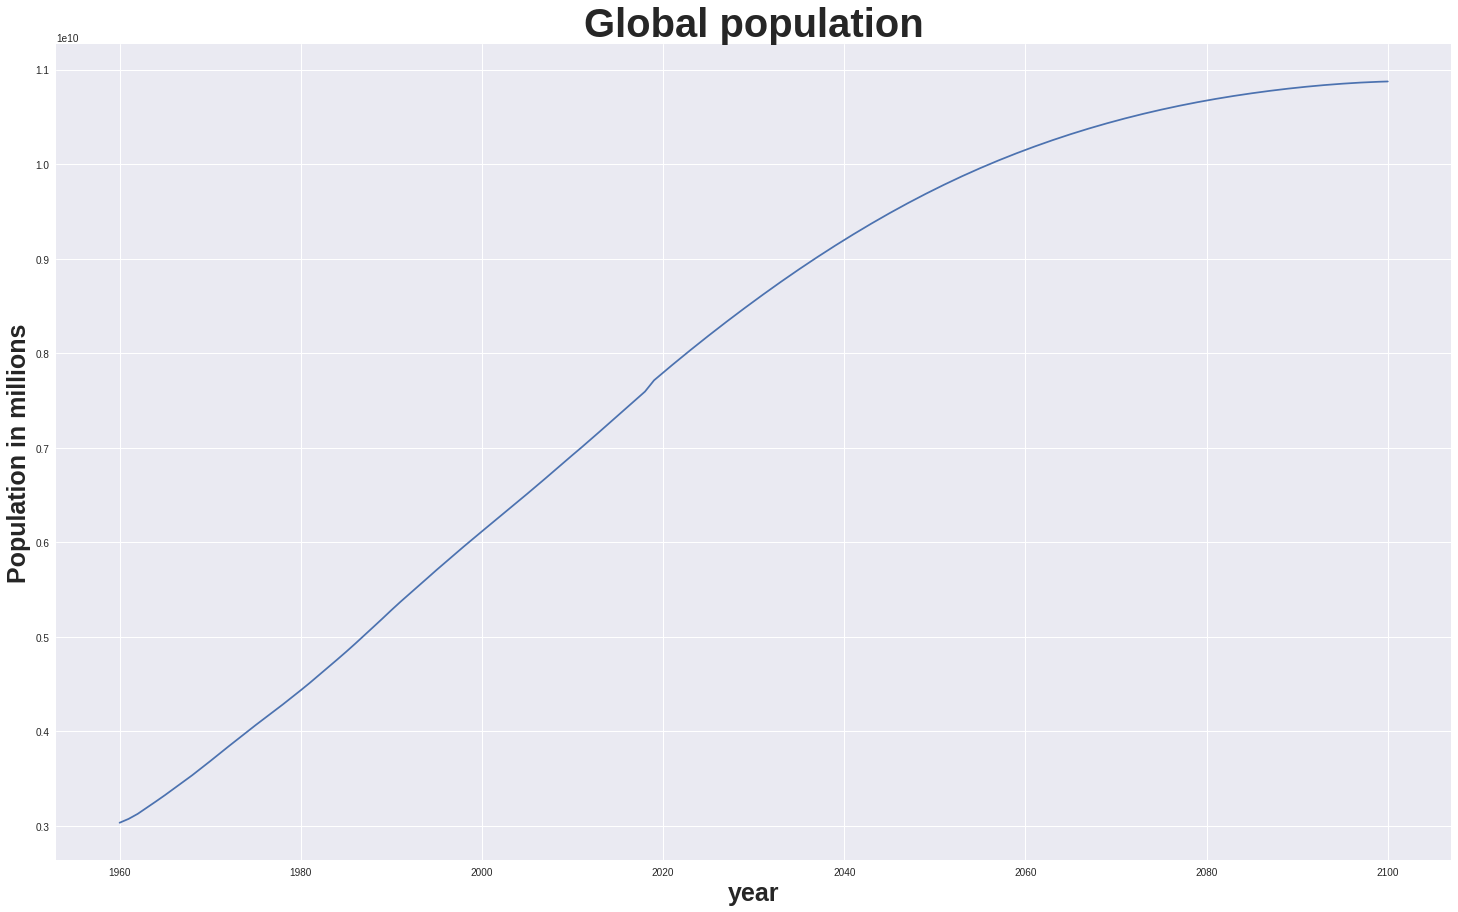

In [10]:
plt.figure(1,figsize=(25, 15))
plt.style.use('seaborn')

# plot
a = np.arange(1960, 1960+len(prospected_population))
#print(len(prospected_population[1]))
plt.plot(a, prospected_population.iloc[:,0])

# plot properties
plt.title('Global population', weight = 'bold').set_fontsize(40)
plt.xlabel('year', weight = 'bold').set_fontsize(25)
plt.ylabel('Population in millions', weight = 'bold').set_fontsize(25)

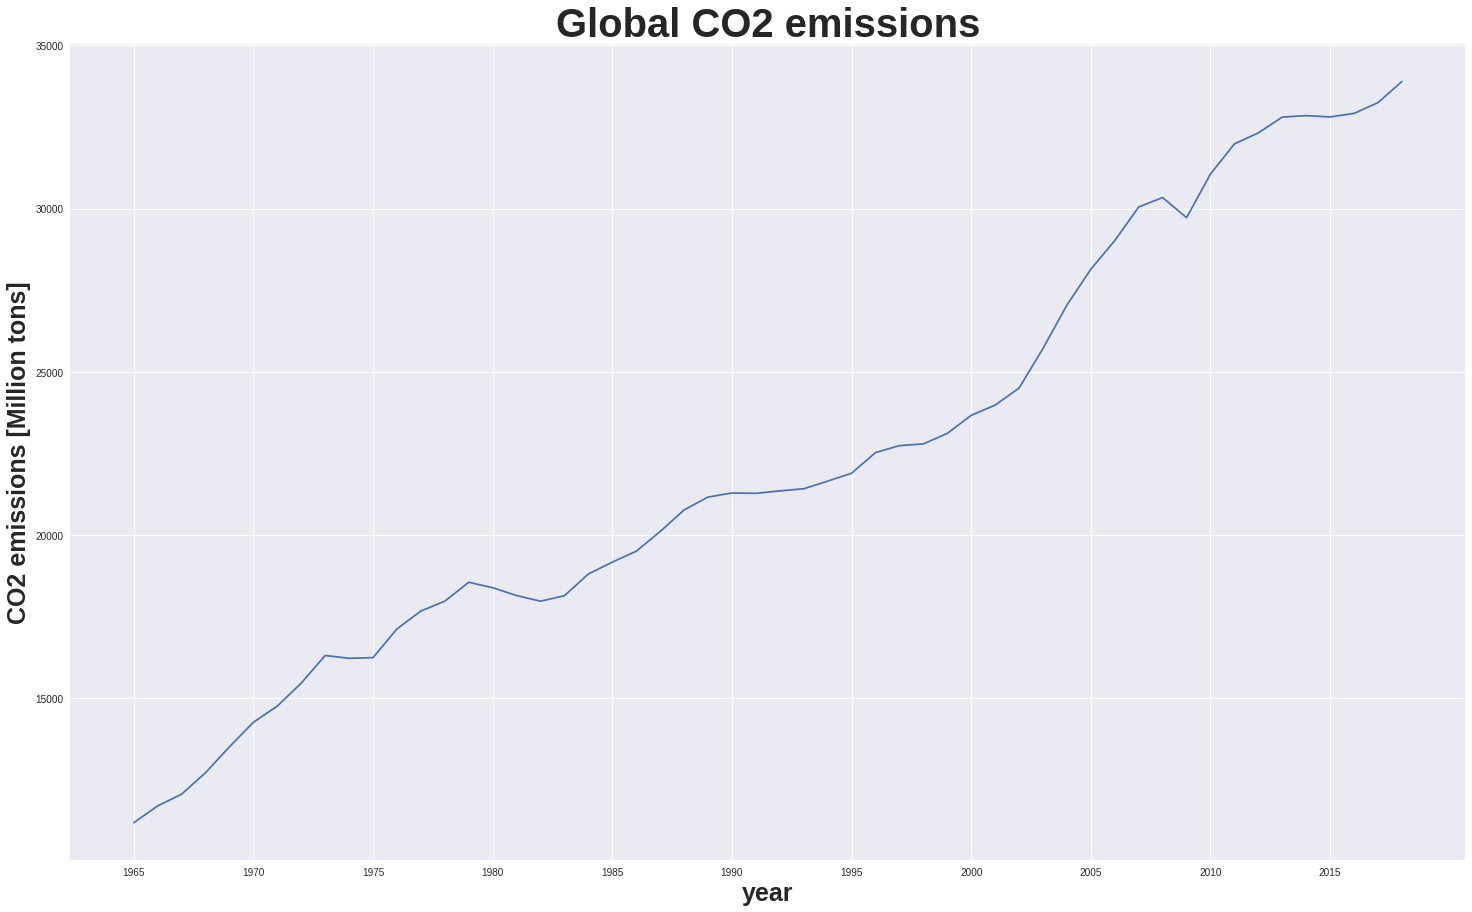

In [11]:
# CO2 emissions
plt.figure(1,figsize=(25, 15))
plt.style.use('seaborn')
plt.plot(annees, CO2)

# plot properties
plt.title('Global CO2 emissions', weight = 'bold').set_fontsize(40)
plt.xlabel('year', weight = 'bold').set_fontsize(25)
plt.ylabel('CO2 emissions [Million tons]', weight = 'bold').set_fontsize(25)
plt.xticks(np.arange(0, len(annees), step=5))
plt.show()

In [12]:
CO2_emission_dataframe = pd.DataFrame(CO2_emission) # numpy Series to DataFrame
# rename the index
CO2_emission_dataframe.index.names = ['Time']

In [13]:
CO2_per_inhabitant = CO2_emission_dataframe.merge(prospected_population, left_on = 'Time', right_on = 'Time')

#CO2_per_inhabitant = CO2_per_inhabitant.rename(columns = {0:'CO2 emissions'})
CO2_per_inhabitant['kg CO2 per inhabitant'] = 1e6 * CO2_per_inhabitant['Total World'] / CO2_per_inhabitant['Global population']


In [14]:
annees = CO2_per_inhabitant.index
CO2 = CO2_per_inhabitant['kg CO2 per inhabitant'].values
limite = 2.0*np.ones((len(annees),1)) # limit recommended by the GIEC for 2050

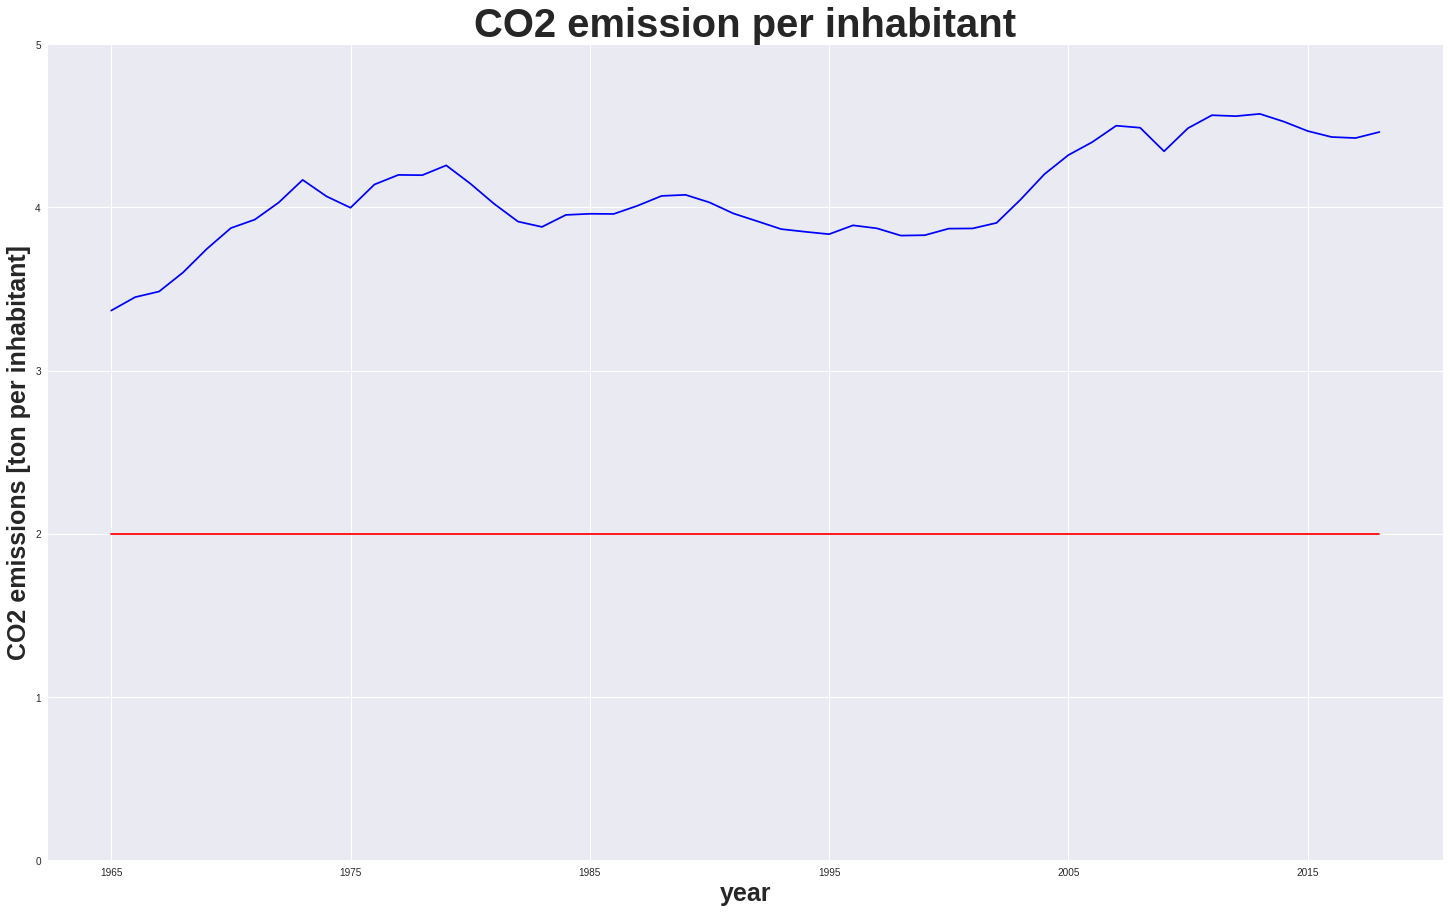

In [15]:
# CO2 emissions
plt.figure(figsize=(25, 15))
#fig, ax = plt.subplots(figsize=(13, 13))

#plt.figure(1,figsize=(25, 5))
#plt.style.use('seaborn')
plt.plot(annees, limite, 'r')
plt.plot(annees, CO2_per_inhabitant['kg CO2 per inhabitant'].values, 'b')

# plot properties
plt.title('CO2 emission per inhabitant', weight = 'bold').set_fontsize(40)
plt.xlabel('year', weight = 'bold').set_fontsize(25)
plt.ylabel('CO2 emissions [ton per inhabitant]', weight = 'bold').set_fontsize(25)
plt.ylim(0,5)
plt.xticks(np.arange(0, len(annees), step=10))
plt.show()

# PARTIE 2 : Lien entre énergies renouvelables et production de CO2

## 1. Carte de la production de CO2 mondiale (2018)

### 1.1 Import de la production de CO2 par pays

In [16]:
# Création du DataFrame
url_bp_data = "https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2019-all-data.xlsx"
CO2_data = pd.read_excel(url_bp_data, sheet_name = 'Carbon Dioxide Emissions', header=2, nrows=107)

In [17]:
CO2_data

,Million tonnes of carbon dioxide,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2014,2015,2016,2017,2018,2018.1,2007-17,2018.2,Unnamed: 58,Unnamed: 59
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Canada,259.855545,271.067865,284.905440,307.276993,319.226620,343.758421,350.733306,367.045631,386.166198,...,551.315913,544.567585,535.898708,549.536093,550.294100,0.001379,-0.000297,0.016237,NaN,NaN
2,Mexico,62.123770,65.046012,66.637857,72.161228,79.096162,84.161695,89.451323,99.660237,107.661950,...,459.159973,462.968167,468.539460,476.846262,462.477817,-0.030132,0.010655,0.013646,NaN,NaN
3,US,3480.084706,3675.466374,3772.622833,3994.225972,4170.119294,4298.208775,4340.724935,4564.699478,4764.400900,...,5300.386902,5153.692957,5053.718664,5014.356761,5145.163187,0.026086,-0.015482,0.151816,NaN,NaN
4,Total North America,3802.064021,4011.580252,4124.166130,4373.664194,4568.442077,4726.128891,4780.909564,5031.405347,5258.229048,...,6310.862789,6161.228709,6058.156832,6040.739115,6157.935105,0.019401,-0.012366,0.181699,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Argentina,77.224567,79.461008,81.726244,84.117886,86.779680,80.409976,85.127121,86.639731,89.688672,...,182.772357,186.042635,185.880770,184.132418,180.288732,-0.020875,0.016265,0.005320,NaN,NaN
7,Brazil,51.478721,56.114605,57.985260,68.091715,74.252664,84.111402,92.486799,104.066838,124.298611,...,504.610030,487.613470,450.987086,458.870202,441.760774,-0.037286,0.027242,0.013035,NaN,NaN
8,Chile,16.704365,17.923391,18.252535,18.728529,19.850407,20.933188,22.388057,22.373272,21.603398,...,88.408545,88.919084,94.062949,93.098796,95.804487,0.029063,0.019875,0.002827,NaN,NaN
9,Colombia,21.308531,23.052587,24.368449,25.214098,25.320421,27.662611,26.202925,29.349780,28.591360,...,89.190406,89.786286,97.862157,93.189880,98.060051,0.052261,0.044971,0.002893,NaN,NaN


In [18]:
# Nettoyage du dataframe
CO2_data = CO2_data[CO2_data.columns[:-5]]
CO2_data = CO2_data.rename(columns={"Million tonnes of carbon dioxide": "country"})
CO2_data = CO2_data[pd.notnull(CO2_data['country'])]

# On ne garde que les pays (pas les continents)
CO2_data = CO2_data[~CO2_data["country"].str.contains('Total',case=False)]
CO2_data = CO2_data[~CO2_data["country"].str.contains('Other',case=False)]
CO2_data

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Canada,259.855545,271.067865,284.905440,307.276993,319.226620,343.758421,350.733306,367.045631,386.166198,...,502.255349,526.724639,539.016148,523.221630,541.920046,551.315913,544.567585,535.898708,549.536093,550.294100
2,Mexico,62.123770,65.046012,66.637857,72.161228,79.096162,84.161695,89.451323,99.660237,107.661950,...,433.023325,442.415847,465.416188,473.698587,472.509510,459.159973,462.968167,468.539460,476.846262,462.477817
3,US,3480.084706,3675.466374,3772.622833,3994.225972,4170.119294,4298.208775,4340.724935,4564.699478,4764.400900,...,5263.896393,5465.593465,5355.706387,5137.040658,5260.471403,5300.386902,5153.692957,5053.718664,5014.356761,5145.163187
6,Argentina,77.224567,79.461008,81.726244,84.117886,86.779680,80.409976,85.127121,86.639731,89.688672,...,154.308473,166.044082,168.794029,175.337289,182.845162,182.772357,186.042635,185.880770,184.132418,180.288732
7,Brazil,51.478721,56.114605,57.985260,68.091715,74.252664,84.111402,92.486799,104.066838,124.298611,...,351.424125,399.383601,424.390027,443.383728,483.417278,504.610030,487.613470,450.987086,458.870202,441.760774
8,Chile,16.704365,17.923391,18.252535,18.728529,19.850407,20.933188,22.388057,22.373272,21.603398,...,74.341493,76.052670,86.996835,89.372652,91.106419,88.408545,88.919084,94.062949,93.098796,95.804487
9,Colombia,21.308531,23.052587,24.368449,25.214098,25.320421,27.662611,26.202925,29.349780,28.591360,...,65.176641,72.621915,71.274809,79.741339,83.478395,89.190406,89.786286,97.862157,93.189880,98.060051
10,Ecuador,2.068513,2.150559,2.312434,2.763361,2.931987,3.480900,3.802887,3.839428,4.320808,...,27.888094,32.131528,32.911493,34.292112,36.557959,38.477093,37.583244,35.452819,34.368138,37.066081
11,Peru,12.529142,15.395373,15.488571,15.669609,15.653769,16.413505,16.423962,14.226246,16.641077,...,34.857420,38.647339,44.060800,43.797627,45.096540,46.012328,49.699872,53.166078,49.176378,52.307291
12,Trinidad & Tobago,7.782745,8.142231,8.625386,8.862213,9.184469,9.718195,9.874023,14.304807,14.178553,...,20.404236,22.486217,22.497177,21.835522,23.154497,22.559142,22.146063,21.554649,20.733104,20.717074


### 1.2 Création de la carte

In [19]:
world_shape = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_shape = world_shape.rename(columns={"name": "country"})
world_shape.head()

,pop_est,continent,country,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


On doit traiter les correspondances sur les noms des pays : 

In [20]:
CO2_data_countries = CO2_data.country.values.tolist()
CO2_data_countries.sort()
print(CO2_data_countries)

['Algeria', 'Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Brazil', 'Bulgaria', 'Canada', 'Central America', 'Chile', 'China', 'China Hong Kong SAR', 'Colombia', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Eastern Africa', 'Ecuador', 'Egypt', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lithuania', 'Luxembourg', 'Malaysia', 'Mexico', 'Middle Africa', 'Morocco', 'Netherlands', 'New Zealand', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russian Federation', 'Saudi Arabia', 'Singapore', 'Slovakia', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sri Lanka', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'Trinidad & Tobago', 'Turkey', 'Turkmenistan', 'US', 'USSR', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Uzbekistan',

In [21]:
world_shape_countries = world_shape.country.values.tolist()
world_shape_countries.sort()
print(world_shape_countries)

['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antarctica', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herz.', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Rep.', 'Chad', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Dem. Rep. Congo', 'Denmark', 'Djibouti', 'Dominican Rep.', 'Ecuador', 'Egypt', 'El Salvador', 'Eq. Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Falkland Is.', 'Fiji', 'Finland', 'Fr. S. Antarctic Lands', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', '

In [22]:
# On récupère les données sur les pays que l'on peut... 
# Les pays africains notamment ne sont pas assez documentés individuellement
country_rename_dict = {'Czech Republic': 'Czechia', 
                       'North Macedonia': 'Macedonia', 
                       'Russian Federation': 'Russia', 
                       'Trinidad & Tobago': 'Trinidad and Tobago',
                       'US': 'United States of America'}

CO2_data['country'] = CO2_data['country'].map(country_rename_dict).fillna(CO2_data['country'])
CO2_data

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
1,Canada,259.855545,271.067865,284.905440,307.276993,319.226620,343.758421,350.733306,367.045631,386.166198,...,502.255349,526.724639,539.016148,523.221630,541.920046,551.315913,544.567585,535.898708,549.536093,550.294100
2,Mexico,62.123770,65.046012,66.637857,72.161228,79.096162,84.161695,89.451323,99.660237,107.661950,...,433.023325,442.415847,465.416188,473.698587,472.509510,459.159973,462.968167,468.539460,476.846262,462.477817
3,United States of America,3480.084706,3675.466374,3772.622833,3994.225972,4170.119294,4298.208775,4340.724935,4564.699478,4764.400900,...,5263.896393,5465.593465,5355.706387,5137.040658,5260.471403,5300.386902,5153.692957,5053.718664,5014.356761,5145.163187
6,Argentina,77.224567,79.461008,81.726244,84.117886,86.779680,80.409976,85.127121,86.639731,89.688672,...,154.308473,166.044082,168.794029,175.337289,182.845162,182.772357,186.042635,185.880770,184.132418,180.288732
7,Brazil,51.478721,56.114605,57.985260,68.091715,74.252664,84.111402,92.486799,104.066838,124.298611,...,351.424125,399.383601,424.390027,443.383728,483.417278,504.610030,487.613470,450.987086,458.870202,441.760774
8,Chile,16.704365,17.923391,18.252535,18.728529,19.850407,20.933188,22.388057,22.373272,21.603398,...,74.341493,76.052670,86.996835,89.372652,91.106419,88.408545,88.919084,94.062949,93.098796,95.804487
9,Colombia,21.308531,23.052587,24.368449,25.214098,25.320421,27.662611,26.202925,29.349780,28.591360,...,65.176641,72.621915,71.274809,79.741339,83.478395,89.190406,89.786286,97.862157,93.189880,98.060051
10,Ecuador,2.068513,2.150559,2.312434,2.763361,2.931987,3.480900,3.802887,3.839428,4.320808,...,27.888094,32.131528,32.911493,34.292112,36.557959,38.477093,37.583244,35.452819,34.368138,37.066081
11,Peru,12.529142,15.395373,15.488571,15.669609,15.653769,16.413505,16.423962,14.226246,16.641077,...,34.857420,38.647339,44.060800,43.797627,45.096540,46.012328,49.699872,53.166078,49.176378,52.307291
12,Trinidad and Tobago,7.782745,8.142231,8.625386,8.862213,9.184469,9.718195,9.874023,14.304807,14.178553,...,20.404236,22.486217,22.497177,21.835522,23.154497,22.559142,22.146063,21.554649,20.733104,20.717074


In [23]:
CO2_data = world_shape.merge(CO2_data, how='left')
CO2_data = CO2_data.set_index('country')

In [24]:
CO2_data

,pop_est,continent,iso_a3,gdp_md_est,geometry,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
country,,,,,,,,,,,,,,,,,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",259.855545,271.067865,284.905440,307.276993,319.226620,...,502.255349,526.724639,539.016148,523.221630,541.920046,551.315913,544.567585,535.898708,549.536093,550.294100
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",3480.084706,3675.466374,3772.622833,3994.225972,4170.119294,...,5263.896393,5465.593465,5355.706387,5137.040658,5260.471403,5300.386902,5153.692957,5053.718664,5014.356761,5145.163187
Kazakhstan,18556698,Asia,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",NaN,NaN,NaN,NaN,NaN,...,170.618192,183.856631,202.454528,209.680027,210.989967,212.494130,207.510037,208.487185,219.677582,248.122091
Uzbekistan,29748859,Asia,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",NaN,NaN,NaN,NaN,NaN,...,102.869525,100.689421,107.100043,104.045575,103.464789,108.129684,103.074903,103.242399,107.190468,104.271738
Papua New Guinea,6909701,Oceania,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Indonesia,260580739,Asia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",20.140746,19.548792,18.687913,19.614088,21.292424,...,387.933557,427.566674,478.980933,511.831401,526.438560,480.618669,488.605902,493.084053,516.104681,542.970787


/home/antonin/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1060: RuntimeWarning: invalid value encountered in less_equal
  mask = (resdat <= 0)
/home/antonin/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


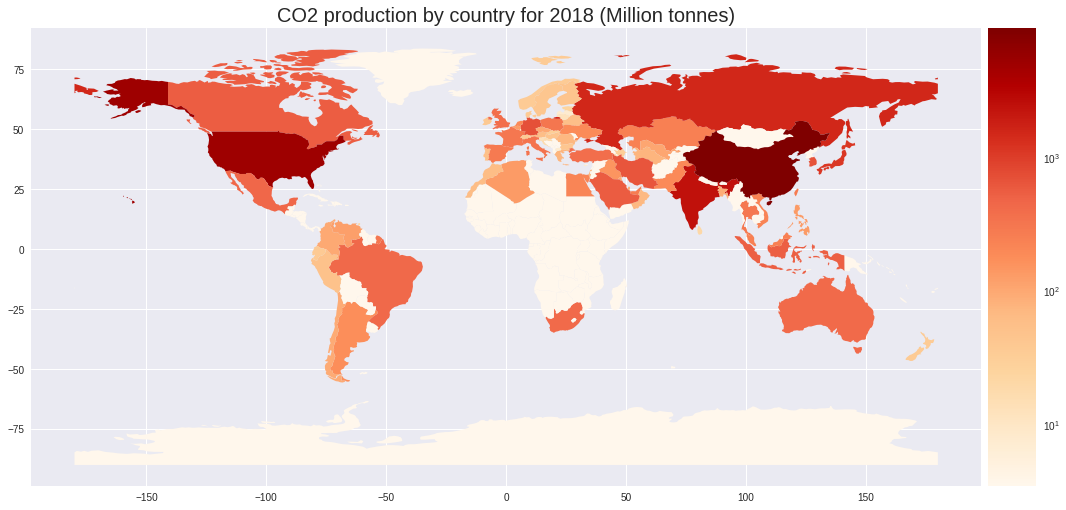

In [25]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(figsize=(18, 10))
plt.title('CO2 production by country for 2018 (Million tonnes)').set_fontsize(20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
CO2_data.plot(column=2018, ax=ax, legend=True, cax=cax, cmap='OrRd',
             norm=matplotlib.colors.LogNorm(vmin=CO2_data[2018].min(), vmax=CO2_data[2018].max()))
plt.show()

## 2. Carte de la consommation d'énergie mondiale (2018)

In [26]:
Energy_data = pd.read_excel(url_bp_data, sheet_name = 'Primary Energy Consumption', header=2, nrows=107)

# Nettoyage du dataframe
Energy_data = Energy_data[Energy_data.columns[:-5]]
Energy_data = Energy_data.rename(columns={"Million tonnes oil equivalent": "country"})
Energy_data = Energy_data[pd.notnull(Energy_data['country'])]

Energy_data = Energy_data[~Energy_data["country"].str.contains('Total',case=False)]
Energy_data = Energy_data[~Energy_data["country"].str.contains('Other',case=False)]

In [27]:
Energy_data['country'] = Energy_data['country'].map(country_rename_dict).fillna(Energy_data['country'])
Energy_data = world_shape.merge(Energy_data, how='left')
Energy_data = Energy_data.set_index('country')

/home/antonin/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:1060: RuntimeWarning: invalid value encountered in less_equal
  mask = (resdat <= 0)
/home/antonin/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


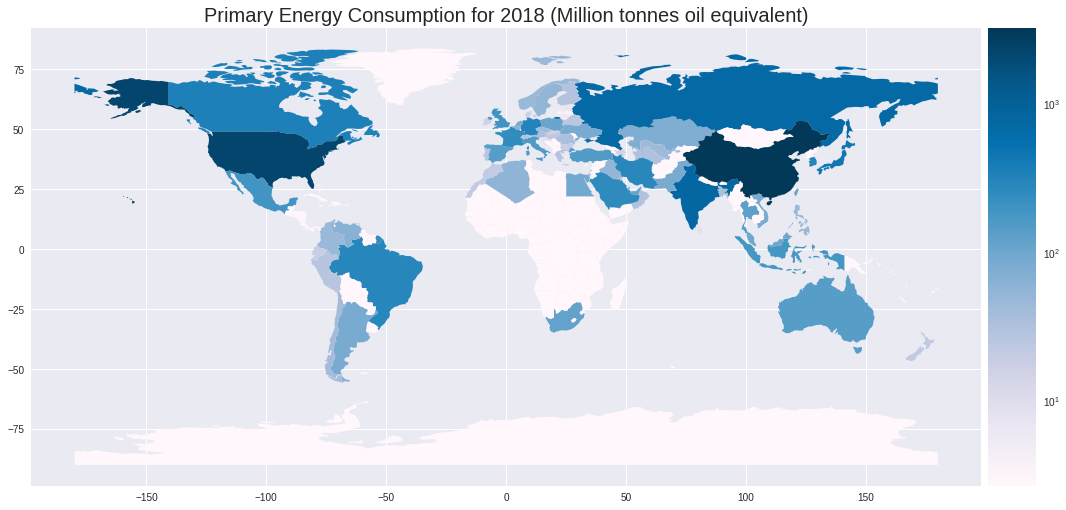

In [28]:
fig, ax = plt.subplots(figsize=(18, 10))
plt.title('Primary Energy Consumption for 2018 (Million tonnes oil equivalent)').set_fontsize(20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
Energy_data.plot(column=2018, ax=ax, legend=True, cax=cax, cmap='PuBu',
             norm=matplotlib.colors.LogNorm(vmin=Energy_data[2018].min(), vmax=Energy_data[2018].max()))
plt.show()

On voit que les pays qui consomment le plus d'énergie sont ceux qui semblent produire le plus de CO2, y a t-il des exceptions?

## 3. Lien entre consommation d'énergie et production de CO2

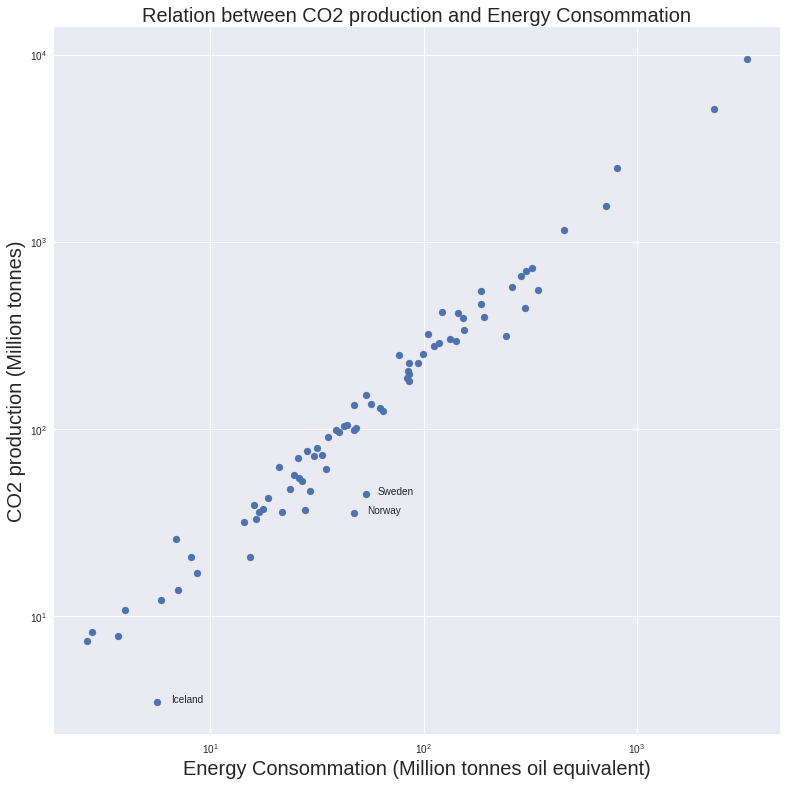

In [29]:
fig, ax = plt.subplots(figsize=(13, 13))

energie_cons_2018 = Energy_data[2018]
CO2_prod_2018 = CO2_data[2018]
x = energie_cons_2018.values
y = CO2_prod_2018.values
labels = CO2_data.index
plt.scatter(x, y)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy Consommation (Million tonnes oil equivalent)').set_fontsize(20)
plt.ylabel('CO2 production (Million tonnes)').set_fontsize(20)
plt.title('Relation between CO2 production and Energy Consommation').set_fontsize(20)
for i, label in enumerate(labels):
    if label in ['Iceland', 'Norway', 'Sweden']:
        plt.annotate(label, (x[i], y[i]), rotation=0,
                             textcoords="offset points", xytext=(30, 0), ha='center')
plt.show()

On voit qu'une tendance linéaire se dégage entre consommation d'énergie et production de CO2 mais certains pays se démarquent, principalement l'Islande, La Norvège et la Suède. Comment font ces pays pour produire moins de CO2 que la moyenne, l'utilisation d'énergie renouvelable est-elle un facteur dans leur démarcation?  

## 4. Rapport entre ratio d'énergie renouvelable consommée et production de CO2

Part d'énergie renouvelable par rapport à l'énergie totale consommée :

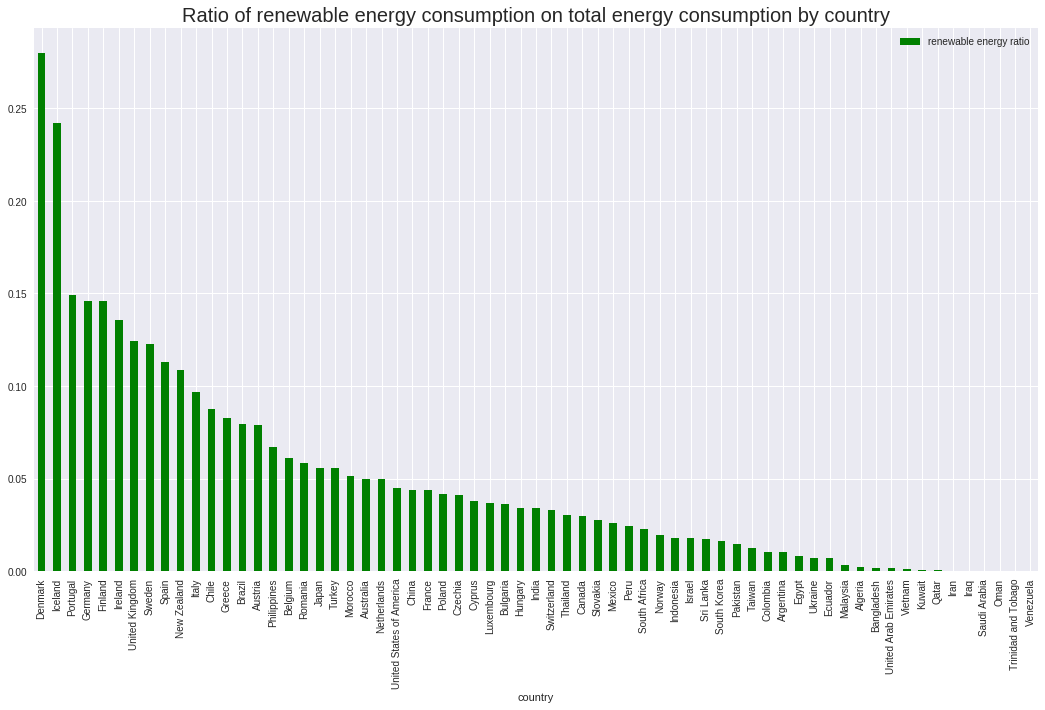

In [30]:
# Création, nettoyage et calculs sur le dataframe
Renewables_data = pd.read_excel(url_bp_data, sheet_name = 'Renewables - Mtoe', header=2, nrows=107)
Renewables_data = Renewables_data[Renewables_data.columns[:-5]]
Renewables_data = Renewables_data.rename(columns={"Million tonnes oil equivalent": "country"})
Renewables_data = Renewables_data[pd.notnull(Renewables_data['country'])]
Renewables_data = Renewables_data[~Renewables_data["country"].str.contains('Total',case=False)]
Renewables_data = Renewables_data[~Renewables_data["country"].str.contains('Other',case=False)]
Renewables_data['country'] = Renewables_data['country'].map(country_rename_dict).fillna(Renewables_data['country'])
Renewables_data = Renewables_data.set_index('country')

# Apport des données du dataframe de l'énergie totale consommée
Total_energy_2018 = Energy_data[2018]
Total_energy_2018 = Total_energy_2018.rename(columns={2018: "Total_energy"})
Renewables_data = Renewables_data.merge(Total_energy_2018.rename('Total_energy_2018'), left_index=True, right_index=True)
Renewables_data['renewable energy ratio'] = Renewables_data[2018] / Renewables_data['Total_energy_2018']
Renewables_data_clean = Renewables_data.dropna()

# Plot
Renewables_data_clean = Renewables_data_clean.sort_values('renewable energy ratio', ascending=False)
Renewables_data_clean.plot.bar(y='renewable energy ratio', rot=90, figsize=(18,10), color='green')
plt.title('Ratio of renewable energy consumption on total energy consumption by country').set_fontsize(20)
plt.show()

In [31]:
# A noter que l'énergie nucléaire ne semble pas considérée comme une énergie renouvelable dans le dataset utilisé

In [32]:
Renewables_data_map =  world_shape.set_index('country').join(Renewables_data_clean, how='left')

/home/antonin/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:479: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


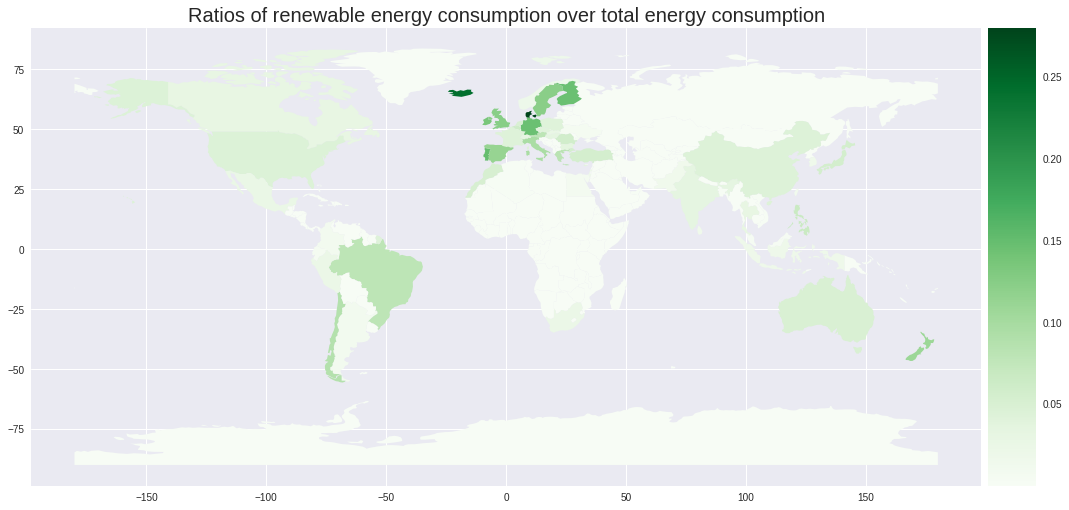

In [33]:
fig, ax = plt.subplots(figsize=(18, 10))
plt.title('Ratios of renewable energy consumption over total energy consumption').set_fontsize(20)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
Renewables_data_map.plot(column='renewable energy ratio', ax=ax, legend=True, cax=cax, cmap='Greens')
plt.show()

In [34]:
Renewable_best_ratios = Renewables_data_clean[Renewables_data_clean['renewable energy ratio'] > 0.1]
Renewable_best_ratios = Renewable_best_ratios.merge(CO2_prod_2018.rename('CO2_prod_2018'), left_index=True, right_index=True)

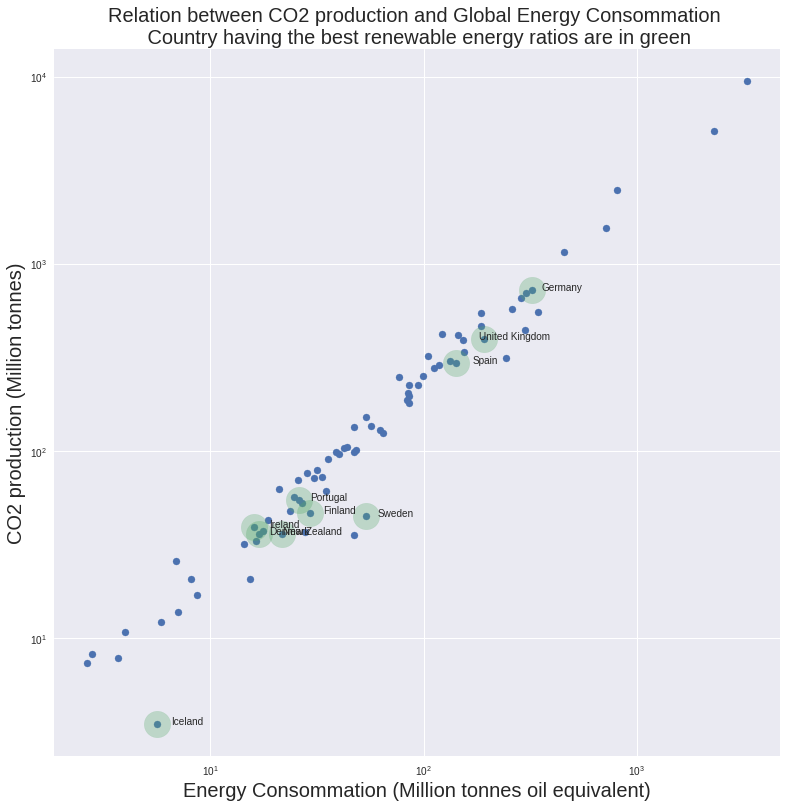

In [35]:
fig, ax = plt.subplots(figsize=(13, 13))

energie_cons_2018 = Energy_data[2018]
CO2_prod_2018 = CO2_data[2018]
x = energie_cons_2018.values
y = CO2_prod_2018.values
x_best = Renewable_best_ratios['Total_energy_2018']
y_best = Renewable_best_ratios['CO2_prod_2018']

labels = Renewable_best_ratios.index
plt.scatter(x, y)
plt.scatter(x_best, y_best, s=700, alpha=0.3)
for i, label in enumerate(labels):
    plt.annotate(label, (x_best[i], y_best[i]), rotation=0,
                 textcoords="offset points", xytext=(30, 0), ha='center')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('Energy Consommation (Million tonnes oil equivalent)').set_fontsize(20)
plt.ylabel('CO2 production (Million tonnes)').set_fontsize(20)
plt.title('Relation between CO2 production and Global Energy Consommation \n Country having the best renewable energy ratios are in green').set_fontsize(20)
plt.show()



Il n'y a pas de lien très clair, les pays consommant une part importante d'énergies renouvelable peuvent produire autant de CO2 que des pays dans la moyenne.

# PARTIE 3 : Tendances sur les énergies non émettrices de CO2

In [36]:
df = pd.read_csv('Data/all_energy_statistics.csv')
df.drop('quantity_footnotes', axis=1, inplace=True)
df.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
0,Austria,Additives and Oxygenates - Exports,1996,"Metric tons, thousand",5.0,additives_and_oxygenates
1,Austria,Additives and Oxygenates - Exports,1995,"Metric tons, thousand",17.0,additives_and_oxygenates
2,Belgium,Additives and Oxygenates - Exports,2014,"Metric tons, thousand",0.0,additives_and_oxygenates
3,Belgium,Additives and Oxygenates - Exports,2013,"Metric tons, thousand",0.0,additives_and_oxygenates
4,Belgium,Additives and Oxygenates - Exports,2012,"Metric tons, thousand",35.0,additives_and_oxygenates


In [37]:
df['category'].value_counts().head(20)

total_electricity                                              133916
gas_oil_diesel_oil                                              97645
fuel_oil                                                        75132
natural_gas_including_lng                                       64161
liquified_petroleum_gas                                         62156
motor_gasoline                                                  53198
fuelwood                                                        52032
electricity_net_installed_capacity_of_electric_power_plants     50229
other_kerosene                                                  43466
hard_coal                                                       42307
kerosene_type_jet_fuel                                          34558
heat                                                            29656
charcoal                                                        28000
conventional_crude_oil                                          27352
other_bituminous_coa

In [38]:
US = df[df['country_or_area']=='United States'].sort_values('year')
print('US :%f', US.shape)
BR= df[df['country_or_area']=='Brazil'].sort_values('year')
print('BR: %f', BR.shape)
CAN = df[df['country_or_area']=='Canada'].sort_values('year')
print('CAN: %f', CAN.shape)
CHI = df[df['country_or_area']=='China'].sort_values('year')
print('CHI: %f', CHI.shape)
IND = df[df['country_or_area']=='India'].sort_values('year')
print('IND: %f', IND.shape)
JAP = df[df['country_or_area']=='Japan'].sort_values('year')
print('JAP: %f', JAP.shape)
UK =df[df['country_or_area']=='United Kingdom'].sort_values('year')
print('UK: %f', UK.shape)

#European Union
SP = df[df['country_or_area']=='Spain'].sort_values('year')
print('SP: %f', SP.shape)
ITA = df[df['country_or_area']=='Italy'].sort_values('year')
print('ITA: %f', ITA.shape)
GER = df[df['country_or_area']=='Germany'].sort_values('year')
print('GER: %f', GER.shape)
FRA = df[df['country_or_area']=='France'].sort_values('year')
print('FRA: %f', FRA.shape)
NETH = df[df['country_or_area']=='Netherlands'].sort_values('year')
print('NETH: %f', NETH.shape)

US :%f (19847, 6)
BR: %f (10374, 6)
CAN: %f (15453, 6)
CHI: %f (11563, 6)
IND: %f (7775, 6)
JAP: %f (17037, 6)
UK: %f (15536, 6)
SP: %f (15815, 6)
ITA: %f (16312, 6)
GER: %f (20422, 6)
FRA: %f (17236, 6)
NETH: %f (15955, 6)


In [39]:
dfUS = pd.DataFrame(US)
dfUS.head(15)

,country_or_area,commodity_transaction,year,unit,quantity,category
1189460,United States,Electricity - total wind production,1990,"Kilowatt-hours, million",3066.0,wind_electricity
374218,United States,Fuelwood - Total energy supply,1990,"Cubic metres, thousand",82119.0,fuelwood
369009,United States,Fuelwood - Production,1990,"Cubic metres, thousand",82119.0,fuelwood
362409,United States,Fuelwood - Final energy consumption,1990,"Cubic metres, thousand",79119.0,fuelwood
357673,United States,Fuelwood - Final consumption,1990,"Cubic metres, thousand",79119.0,fuelwood
346313,United States,Fuelwood - Consumption by other,1990,"Cubic metres, thousand",79119.0,fuelwood
338790,United States,Fuelwood - Consumption by households,1990,"Cubic metres, thousand",79119.0,fuelwood
331737,United States,Fuel oil - Transformation in electricity plant...,1990,"Metric tons, thousand",25666.0,fuel_oil
1123986,United States,Electricity - Own use by coal mines,1990,"Kilowatt-hours, million",14057.0,total_electricity
329223,United States,"Fuel oil - Transformation in electricity, CHP ...",1990,"Metric tons, thousand",25666.0,fuel_oil


In [40]:
IND_WIND = IND[IND['category'] == "wind_electricity"]
IND_WIND

,country_or_area,commodity_transaction,year,unit,quantity,category
1188665,India,Electricity - total wind production,1990,"Kilowatt-hours, million",32.0,wind_electricity
1188664,India,Electricity - total wind production,1991,"Kilowatt-hours, million",39.0,wind_electricity
1188663,India,Electricity - total wind production,1992,"Kilowatt-hours, million",52.0,wind_electricity
1188662,India,Electricity - total wind production,1993,"Kilowatt-hours, million",57.0,wind_electricity
1188661,India,Electricity - total wind production,1994,"Kilowatt-hours, million",182.0,wind_electricity
1188660,India,Electricity - total wind production,1995,"Kilowatt-hours, million",498.0,wind_electricity
1188659,India,Electricity - total wind production,1996,"Kilowatt-hours, million",926.0,wind_electricity
1188658,India,Electricity - total wind production,1997,"Kilowatt-hours, million",1037.0,wind_electricity
1188657,India,Electricity - total wind production,1998,"Kilowatt-hours, million",1127.0,wind_electricity
1188656,India,Electricity - total wind production,1999,"Kilowatt-hours, million",1509.0,wind_electricity


In [41]:
DF1 = pd.DataFrame(df.groupby(['country_or_area', 'category'])['quantity'].agg('sum').reset_index())
DF1.head()

,country_or_area,category,quantity
0,Afghanistan,aviation_gasoline,24.000
1,Afghanistan,charcoal,12593.912
2,Afghanistan,electricity_net_installed_capacity_of_electric...,48228.000
3,Afghanistan,falling_water,394000.000
4,Afghanistan,fuel_oil,152.000


In [42]:
DF2 = DF1.groupby(['category'])['quantity'].agg('sum').reset_index()
DF2.head()

,category,quantity
0,additives_and_oxygenates,1.072431e+06
1,animal_waste,9.788803e+07
2,anthracite,2.614395e+06
3,aviation_gasoline,3.305157e+05
4,bagasse,4.800139e+07


In [43]:
DF3 = pd.DataFrame(df.groupby(['country_or_area', 'category'])['quantity'].agg('sum').reset_index())
DF3.head()

,country_or_area,category,quantity
0,Afghanistan,aviation_gasoline,24.000
1,Afghanistan,charcoal,12593.912
2,Afghanistan,electricity_net_installed_capacity_of_electric...,48228.000
3,Afghanistan,falling_water,394000.000
4,Afghanistan,fuel_oil,152.000


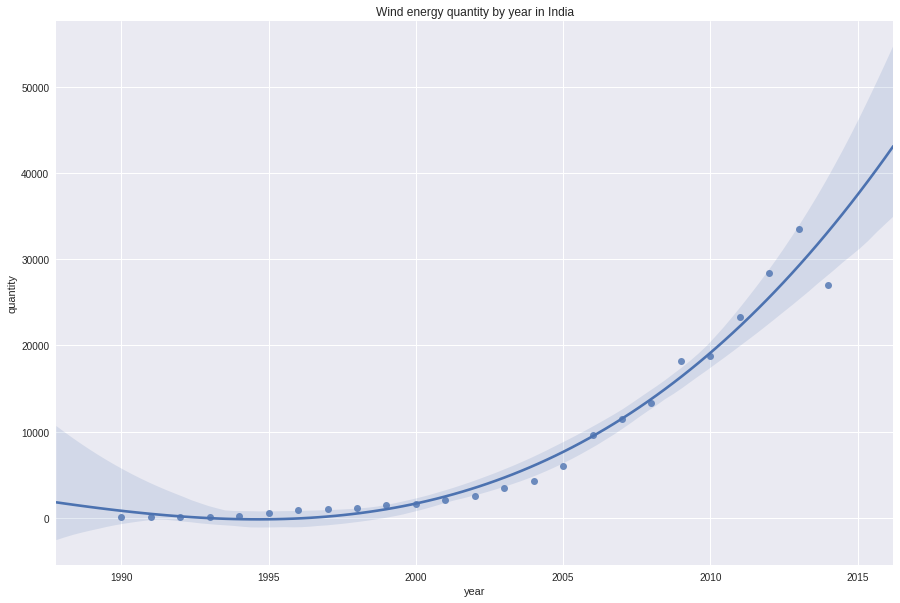

In [44]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot(IND_WIND['year'], IND_WIND['quantity'], order=3)
plt.title("Wind energy quantity by year in India")
plt.show()

In [45]:
US_WIND = US[US['commodity_transaction'] == "Electricity - total wind production"]
BR_WIND = BR[BR['commodity_transaction'] == "Electricity - total wind production"]
CAN_WIND = CAN[CAN['commodity_transaction'] == "Electricity - total wind production"]
CHI_WIND = CHI[CHI['commodity_transaction'] == "Electricity - total wind production"]
JAP_WIND = JAP[JAP['commodity_transaction'] == "Electricity - total wind production"]
UK_WIND = UK[UK['commodity_transaction'] == "Electricity - total wind production"]
SP_WIND = SP[SP['commodity_transaction'] == "Electricity - total wind production"]
ITA_WIND = ITA[ITA['commodity_transaction'] == "Electricity - total wind production"]
GER_WIND = GER[GER['commodity_transaction'] == "Electricity - total wind production"]
FRA_WIND = FRA[FRA['commodity_transaction'] == "Electricity - total wind production"]
NETH_WIND = NETH[NETH['commodity_transaction'] == "Electricity - total wind production"]

In [46]:
WIND = pd.concat([US_WIND, CAN_WIND, CHI_WIND, IND_WIND, UK_WIND, GER_WIND, FRA_WIND])
WIND.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1189460,United States,Electricity - total wind production,1990,"Kilowatt-hours, million",3066.0,wind_electricity
1189459,United States,Electricity - total wind production,1991,"Kilowatt-hours, million",3051.0,wind_electricity
1189458,United States,Electricity - total wind production,1992,"Kilowatt-hours, million",2917.0,wind_electricity
1189457,United States,Electricity - total wind production,1993,"Kilowatt-hours, million",3053.0,wind_electricity
1189456,United States,Electricity - total wind production,1994,"Kilowatt-hours, million",3483.0,wind_electricity


In [47]:
US_SOLAR = US[US['commodity_transaction'] == "Electricity - total solar production"]
CAN_SOLAR = CAN[CAN['commodity_transaction'] == "Electricity - total solar production"]
CHI_SOLAR = CHI[CHI['commodity_transaction'] == "Electricity - total solar production"]
IND_SOLAR = IND[IND['commodity_transaction'] == "Electricity - total solar production"]
UK_SOLAR = UK[UK['commodity_transaction'] == "Electricity - total solar production"]
GER_SOLAR = GER[GER['commodity_transaction'] == "Electricity - total solar production"]
FRA_SOLAR = FRA[FRA['commodity_transaction'] == "Electricity - total solar production"]

In [48]:
SOLAR = pd.concat([US_SOLAR, CAN_SOLAR, CHI_SOLAR, IND_SOLAR, UK_SOLAR, GER_SOLAR, FRA_SOLAR])
SOLAR.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1026691,United States,Electricity - total solar production,1990,"Kilowatt-hours, million",666.0,solar_electricity
1026690,United States,Electricity - total solar production,1991,"Kilowatt-hours, million",782.0,solar_electricity
1026689,United States,Electricity - total solar production,1992,"Kilowatt-hours, million",749.0,solar_electricity
1026688,United States,Electricity - total solar production,1993,"Kilowatt-hours, million",901.0,solar_electricity
1026687,United States,Electricity - total solar production,1994,"Kilowatt-hours, million",828.0,solar_electricity


In [49]:
US_NUCLEAR = US[US['commodity_transaction'] == "Electricity - total nuclear production"]
CAN_NUCLEAR = CAN[CAN['commodity_transaction'] == "Electricity - total nuclear production"]
CHI_NUCLEAR = CHI[CHI['commodity_transaction'] == "Electricity - total nuclear production"]
IND_NUCLEAR = IND[IND['commodity_transaction'] == "Electricity - total nuclear production"]
UK_NUCLEAR = UK[UK['commodity_transaction'] == "Electricity - total nuclear production"]
GER_NUCLEAR = GER[GER['commodity_transaction'] == "Electricity - total nuclear production"]
FRA_NUCLEAR = FRA[FRA['commodity_transaction'] == "Electricity - total nuclear production"]

In [50]:
NUCLEAR = pd.concat([US_NUCLEAR, CAN_NUCLEAR, CHI_NUCLEAR, IND_NUCLEAR, UK_NUCLEAR, GER_NUCLEAR, FRA_NUCLEAR])
NUCLEAR.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
855681,United States,Electricity - total nuclear production,1990,"Kilowatt-hours, million",611589.0,nuclear_electricity
855680,United States,Electricity - total nuclear production,1991,"Kilowatt-hours, million",649399.0,nuclear_electricity
855679,United States,Electricity - total nuclear production,1992,"Kilowatt-hours, million",655970.0,nuclear_electricity
855678,United States,Electricity - total nuclear production,1993,"Kilowatt-hours, million",646987.0,nuclear_electricity
855677,United States,Electricity - total nuclear production,1994,"Kilowatt-hours, million",678920.0,nuclear_electricity


In [51]:
ENERGY=pd.concat([WIND, NUCLEAR, SOLAR]).sort_values('year')
ENERGY.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1189460,United States,Electricity - total wind production,1990,"Kilowatt-hours, million",3066.0,wind_electricity
855172,France,Electricity - total nuclear production,1990,"Kilowatt-hours, million",314081.0,nuclear_electricity
855656,United Kingdom,Electricity - total nuclear production,1990,"Kilowatt-hours, million",65749.0,nuclear_electricity
855248,India,Electricity - total nuclear production,1990,"Kilowatt-hours, million",6141.0,nuclear_electricity
855074,Canada,Electricity - total nuclear production,1990,"Kilowatt-hours, million",72967.0,nuclear_electricity


In [52]:
ENERGY=pd.concat([WIND, NUCLEAR, SOLAR]).sort_values('year')
ENERGY.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1189460,United States,Electricity - total wind production,1990,"Kilowatt-hours, million",3066.0,wind_electricity
855172,France,Electricity - total nuclear production,1990,"Kilowatt-hours, million",314081.0,nuclear_electricity
855656,United Kingdom,Electricity - total nuclear production,1990,"Kilowatt-hours, million",65749.0,nuclear_electricity
855248,India,Electricity - total nuclear production,1990,"Kilowatt-hours, million",6141.0,nuclear_electricity
855074,Canada,Electricity - total nuclear production,1990,"Kilowatt-hours, million",72967.0,nuclear_electricity


In [53]:
IND_ENERGY=pd.concat([IND_WIND, IND_NUCLEAR, IND_SOLAR]).sort_values('year') 
IND_ENERGY.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1188665,India,Electricity - total wind production,1990,"Kilowatt-hours, million",32.0,wind_electricity
855248,India,Electricity - total nuclear production,1990,"Kilowatt-hours, million",6141.0,nuclear_electricity
855247,India,Electricity - total nuclear production,1991,"Kilowatt-hours, million",5524.0,nuclear_electricity
1188664,India,Electricity - total wind production,1991,"Kilowatt-hours, million",39.0,wind_electricity
855246,India,Electricity - total nuclear production,1992,"Kilowatt-hours, million",6726.0,nuclear_electricity


In [54]:
DF3.head()

,country_or_area,category,quantity
0,Afghanistan,aviation_gasoline,24.000
1,Afghanistan,charcoal,12593.912
2,Afghanistan,electricity_net_installed_capacity_of_electric...,48228.000
3,Afghanistan,falling_water,394000.000
4,Afghanistan,fuel_oil,152.000


In [55]:
DF2.head()

,category,quantity
0,additives_and_oxygenates,1.072431e+06
1,animal_waste,9.788803e+07
2,anthracite,2.614395e+06
3,aviation_gasoline,3.305157e+05
4,bagasse,4.800139e+07


In [56]:
IND_ENERGY.head()

,country_or_area,commodity_transaction,year,unit,quantity,category
1188665,India,Electricity - total wind production,1990,"Kilowatt-hours, million",32.0,wind_electricity
855248,India,Electricity - total nuclear production,1990,"Kilowatt-hours, million",6141.0,nuclear_electricity
855247,India,Electricity - total nuclear production,1991,"Kilowatt-hours, million",5524.0,nuclear_electricity
1188664,India,Electricity - total wind production,1991,"Kilowatt-hours, million",39.0,wind_electricity
855246,India,Electricity - total nuclear production,1992,"Kilowatt-hours, million",6726.0,nuclear_electricity


In [57]:
ENERGY_2014 = ENERGY[ENERGY['year']==2014] 

# CURRENT TOTAL (SOLAR, WIND, NUCLEAR) ENERGY PRODUCTION PER COUNTRY

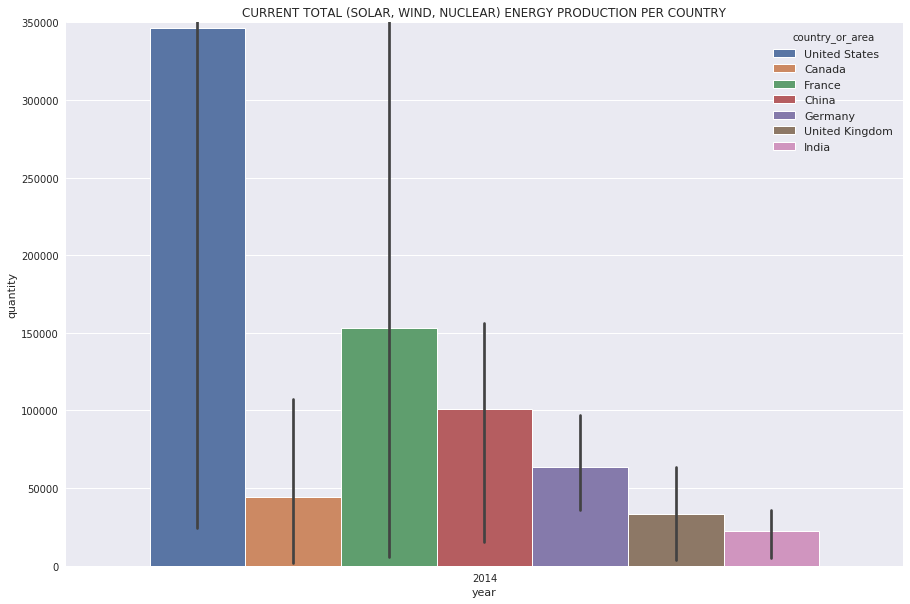

In [58]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set(style="whitegrid")  
ax = sns.barplot(x="year", y="quantity", hue="country_or_area", data=ENERGY_2014)  
plt.title("CURRENT TOTAL (SOLAR, WIND, NUCLEAR) ENERGY PRODUCTION PER COUNTRY")
ax.set(ylim=(0, 350000))
plt.show()

# SOLAR PRODUCTION

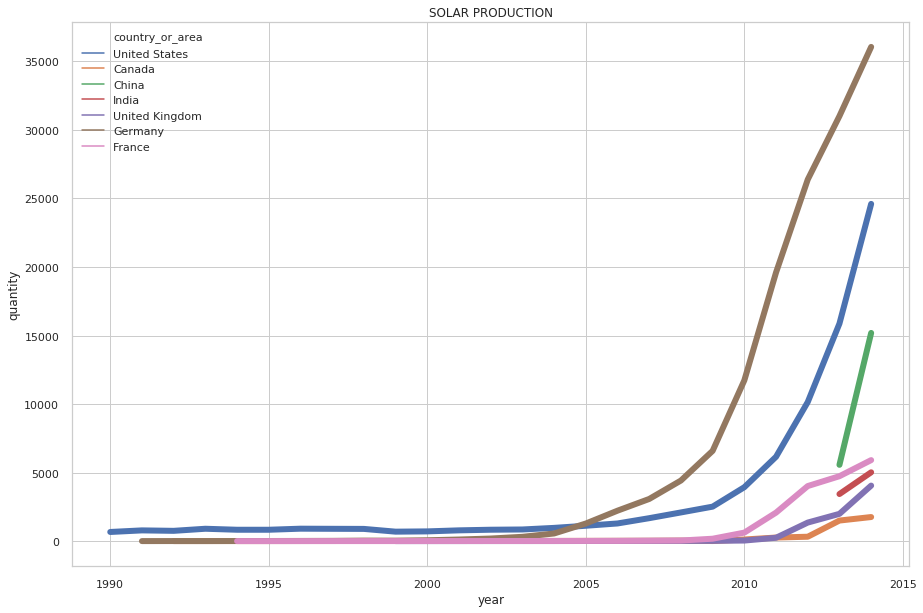

In [59]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set(style="whitegrid") 
sns.lineplot(x="year", y="quantity",
             hue="country_or_area", linewidth = 6,
             data=SOLAR)
plt.title("SOLAR PRODUCTION")
plt.show()

# WIND PRODUCTION

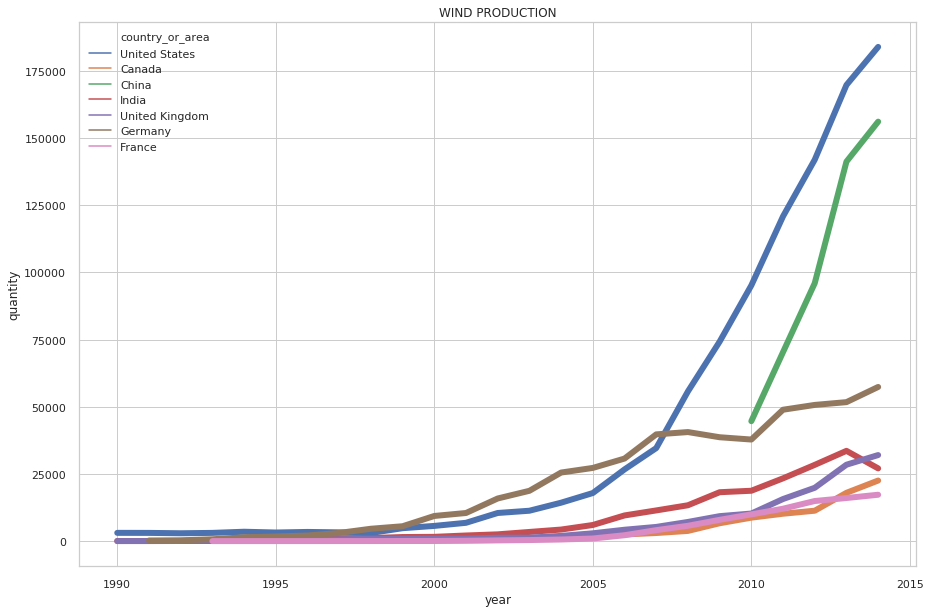

In [60]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set(style="whitegrid") 
sns.lineplot(x="year", y="quantity",
             hue="country_or_area", linewidth = 6,
             data=WIND)
plt.title("WIND PRODUCTION")
plt.show()

# NUCLEAR PRODUCTION

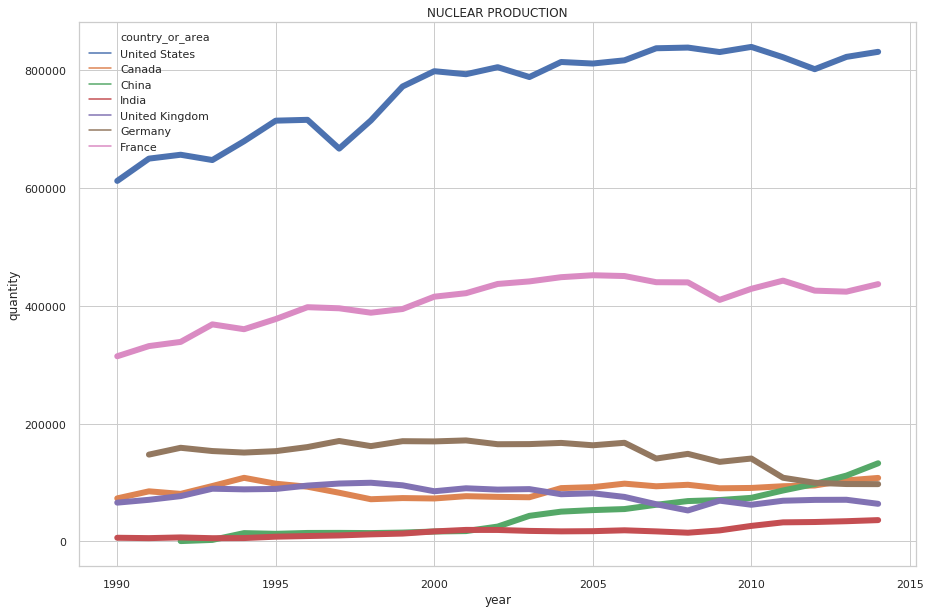

In [61]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set(style="whitegrid") 
ax = sns.lineplot(x="year", y="quantity",
             hue="country_or_area", linewidth = 6, 
             data=NUCLEAR)
plt.title("NUCLEAR PRODUCTION")
plt.show()

In [62]:
ENERGY.head()
ENERGY.groupby('country_or_area')['quantity'].sum().sort_values().head(20)

country_or_area
India               637852.0
China              1580114.0
United Kingdom     2129414.0
Canada             2304282.0
Germany            4226093.0
France            10283934.0
United States     20149833.0
Name: quantity, dtype: float64

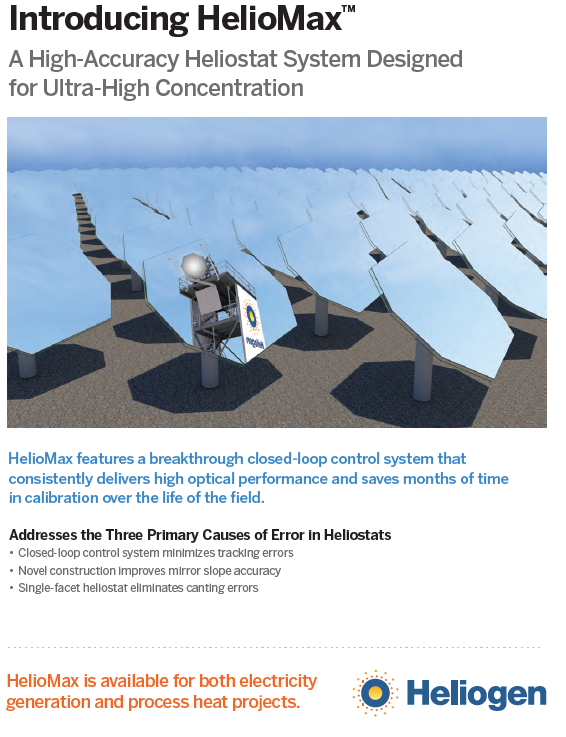

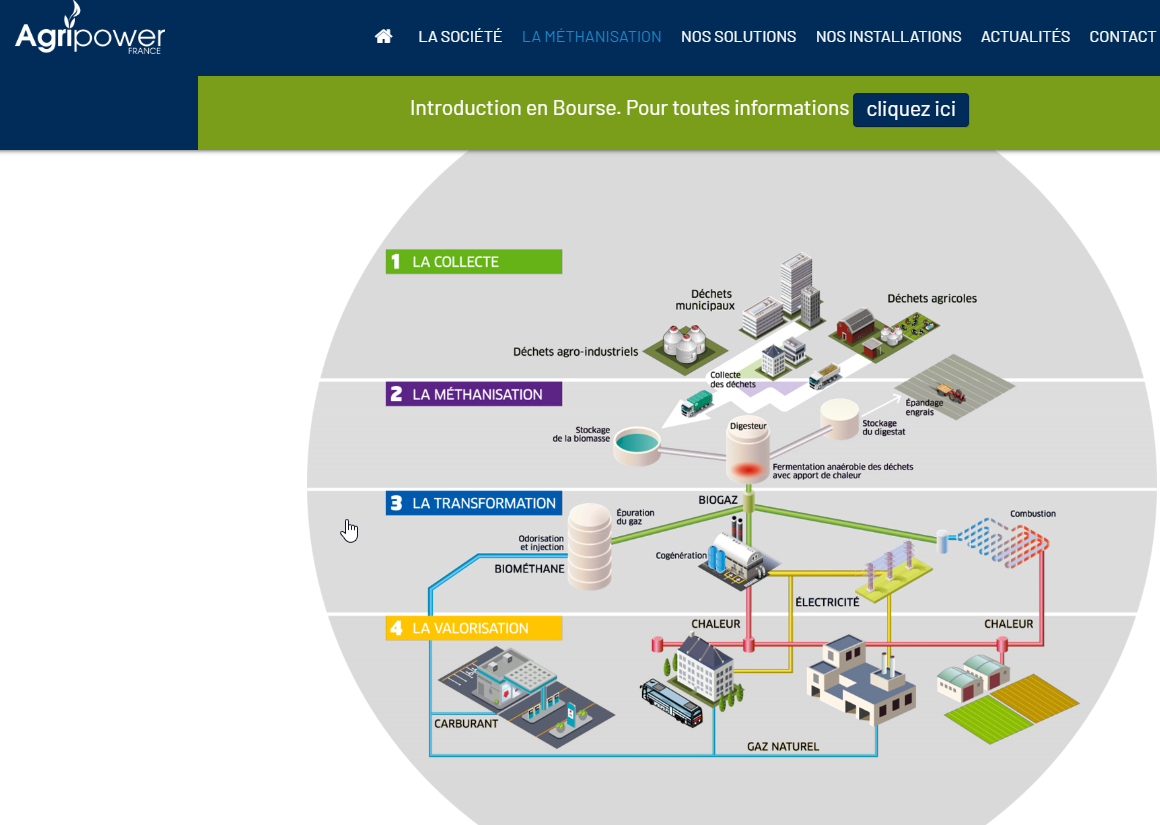

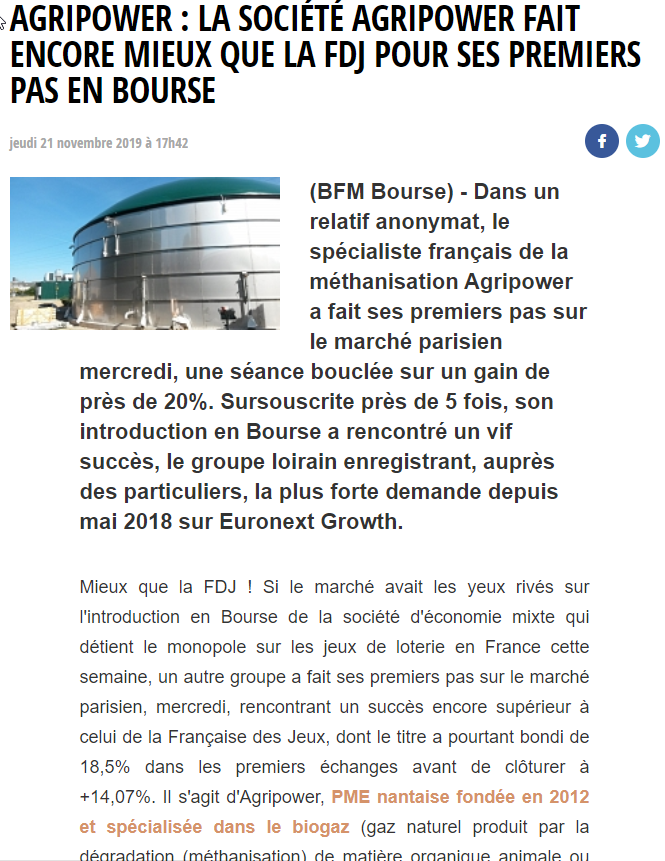